# Application de l'algorithme de krigeage aux contraintes

Nous disposons de 10 tableaux des contraintes à différents temps qui correspondent aux 10 classes de déformation précédemment constituées. Nous allons appliquer notre algorithme de krigeage afin de prédire la valeur de la contrainte pour toutes les familles à n'importe quel temps.

## Préparation

In [1]:
# Importations
import openturns as ot
import openturns.viewer as viewer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Classe à laquelle on s'intéresse :

In [4]:
c = "0"

Importation et préparation de la table :

In [73]:
nom_fichier = "extract_on_group" + c + ".post"
df = pd.read_csv(nom_fichier, sep=" ")
df.drop(columns = df.columns[2:], inplace=True)
df.columns = ["time", "sigma"]

df

,time,sigma
0,300.0,238.282512
1,600.0,246.308479
2,900.0,277.115576
3,1200.0,474.939958


In [72]:
c = "0"
nom_fichier = "krig_classe" + c + ".csv"
dg = pd.read_csv(nom_fichier)
dg

,Unnamed: 0,epsilon_300,epsilon_600,sig
0,0,0.015468,0.012869,277.115576
1,1,0.015675,0.013507,283.979372
2,2,0.014404,0.012510,265.526694
3,3,0.016052,0.013194,277.521627
4,4,0.016392,0.012319,260.585954
5,5,0.014236,0.012632,268.433304
6,6,0.016827,0.012075,255.939757
7,7,0.017212,0.013883,290.489793
8,8,0.015221,0.013634,287.366854
9,9,0.014767,0.013098,277.115576


## Krigeage

In [35]:
n = len(df)
X = df.time.to_numpy().reshape((n,1))
Y = df.sigma.to_numpy().reshape((n,1))

In [59]:
xmin = X[0,0]
xmax = X[-1,0]
X_train = np.linspace(xmin,xmax)
X_train = X_train.reshape((len(X_train),1))

In [60]:
def plot_data_train(x_train,y_train):
    '''Plot the data (x_train,y_train) as a Cloud, in red'''
    graph_train = ot.Cloud(x_train,y_train)
    graph_train.setColor("red")
    graph_train.setLegend("Data")
    return graph_train

In [61]:
def plot_data_test(x_test,y_test):
    '''Plot the data (x_test,y_test) as a Curve, in dashed black'''
    graphF = ot.Curve(x_test,y_test)
    graphF.setLegend("Exact")
    graphF.setColor("black")
    graphF.setLineStyle("dashed")
    return graphF

In [62]:
def plot_data_kriging(x_test,y_test_MM):
    '''Plots (x_test,y_test_MM) from the metamodel as a Curve, in blue'''
    graphK = ot.Curve(x_test,y_test_MM)
    #graphK.setColor("blue")
    graphK.setLegend("Kriging" + c)
    return graphK

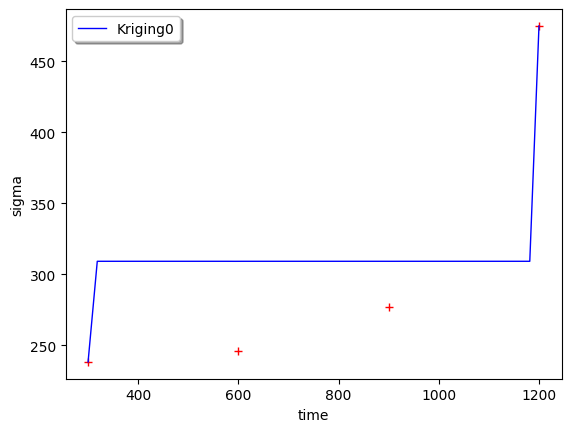

In [77]:
def f(X,Y,X_train):
    dimension = 1
    basis = ot.ConstantBasisFactory(dimension).build()
    covarianceModel = ot.MaternModel([1.]*dimension, 1.5)
    algo = ot.KrigingAlgorithm(X, Y, covarianceModel, basis)
    algo.run()
    krigingResult = algo.getResult()
    
    krigeageMM = krigingResult.getMetaModel()
    Y_MM = krigeageMM(X_train)

    graph = ot.Graph()
    graph.add(plot_data_train(X,Y))
    graph.add(plot_data_kriging(X_train,Y_MM))
    graph.setAxes(True)
    graph.setXTitle("time")
    graph.setYTitle("sigma")
    graph.setLegendPosition("topleft")
    nom_image = "fig/graph_krig_group" + c + ".png"
    view = viewer.View(graph)
    plt.savefig(nom_image)
    
f(X,Y,X_train)

## Toutes les classes à la suite en un code

In [78]:
def g(c):
    nom_fichier = "extract_on_group" + c + ".post"
    df = pd.read_csv(nom_fichier, sep=" ")
    df.drop(columns = df.columns[2:], inplace=True)
    df.columns = ["time", "sigma"]
    
    n = len(df)
    X = df.time.to_numpy().reshape((n,1))
    Y = df.sigma.to_numpy().reshape((n,1))
    
    xmin = X[0,0]
    xmax = X[-1,0]
    X_train = np.linspace(xmin,xmax)
    X_train = X_train.reshape((len(X_train),1))
    
    return X,Y,X_train

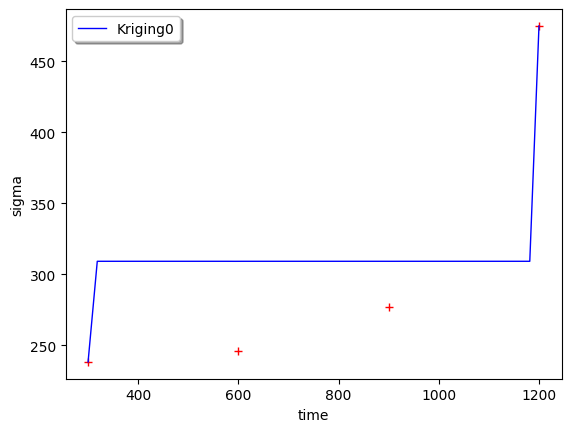

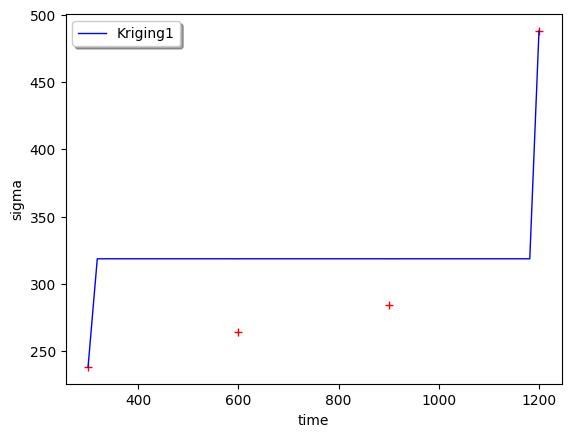

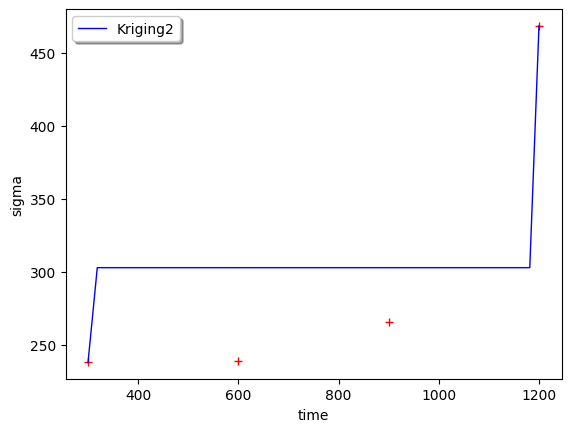

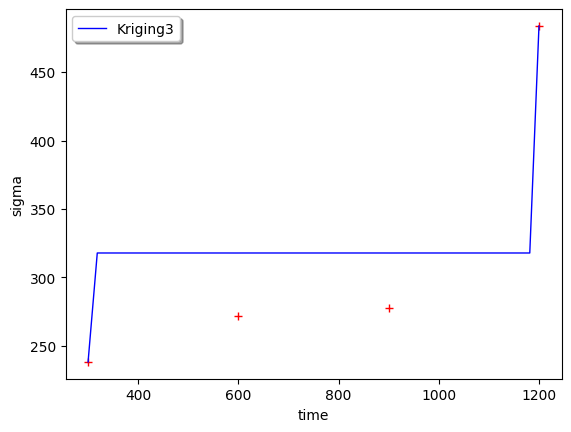

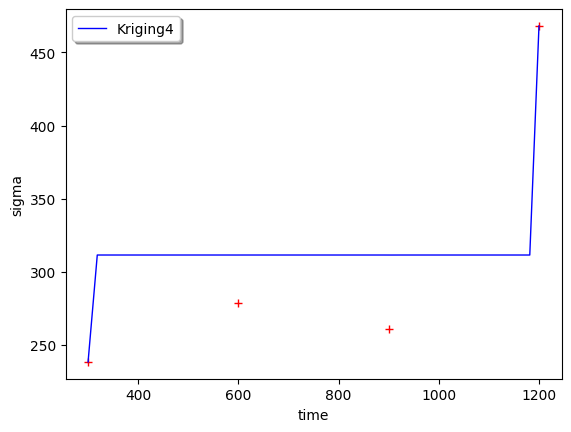

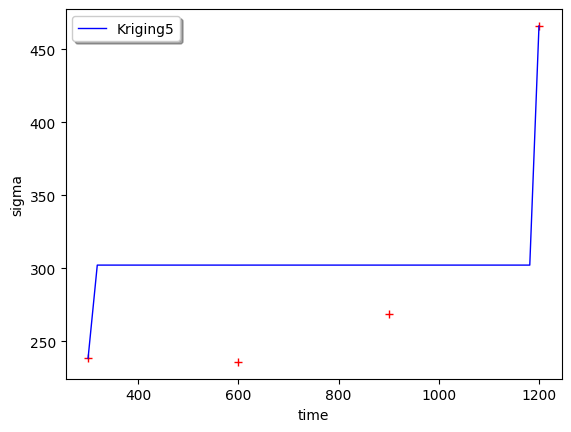

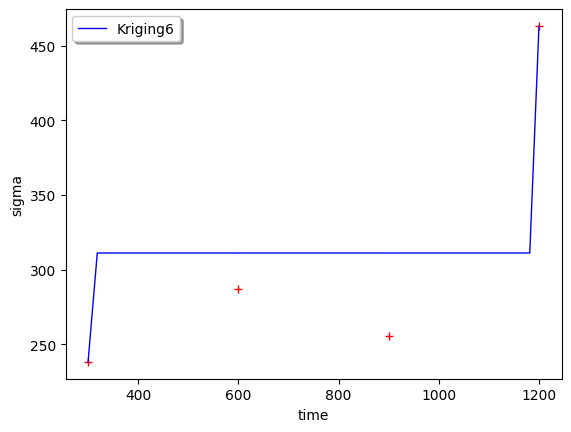

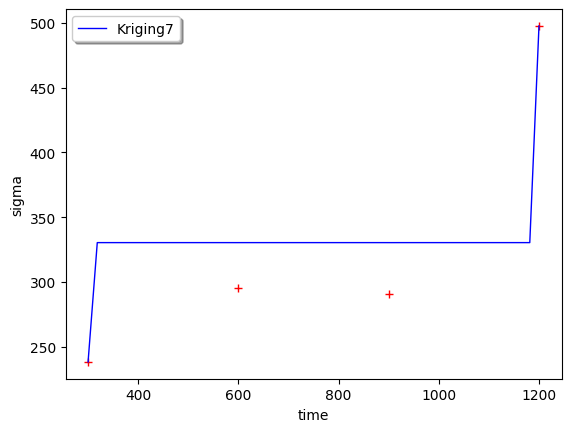

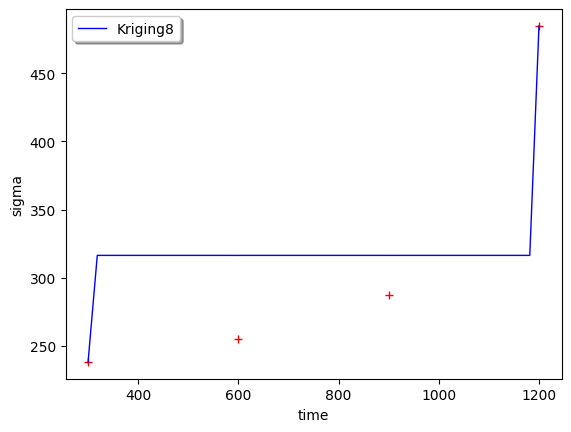

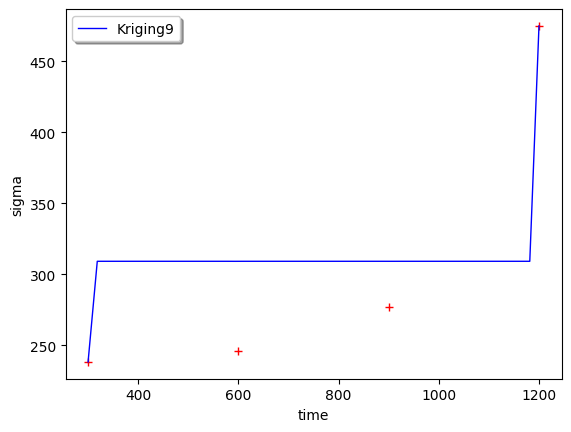

In [81]:
classes = [str(k) for k in range(10)]

for c in classes:
    X,Y,X_train = g(c)
    f(X,Y,X_train)